# Eye_Disease_Detection

# Eye_Disease_Detection Using Transfer Learning and TensorFlow 2.0



In this project we're going to be using machine learning to help us identify Glaucoma.

To do this, we'll be using data from the [Kaggle competition](https://www.kaggle.com/datasets/paultimothymooney/kermany2018). It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

This kind of problem is called multi-class image classification. It's multi-class because we're trying to classify mutliple different breeds of dog. If we were only trying to classify dogs versus cats, it would be called binary classification (one thing versus another).

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in atuomatically adding information to their listings.

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:
1. Get data ready (download from Kaggle, store, import).
2. Prepare the data (preprocessing, the 3 sets, X & y).
3. Choose and fit/train a model ([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).
4. Evaluating a model (making predictions, comparing them with the ground truth labels).
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
6. Save, sharing and reloading your model (once you're happy with the results).

For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

The process of using a pretrained model and adapting it to your own problem is called **transfer learning**. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.

## Getting our workspace ready

Before we get started, since we'll be using TensorFlow 2.x and TensorFlow Hub (TensorFlow Hub), let's import them.

**NOTE:** Don't run the cell below if you're already using TF 2.x.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:",tf.__version__)
print("TF Hub Version:",hub.__version__)

TF Version: 2.10.0
TF Hub Version: 0.8.0


In [3]:
if tf.config.list_physical_devices('GPU'):
  print("GPU allocated")
else:
  print("Allocate GPU")

Allocate GPU


# Accessing the data
Now the data files we're working with are available on our Google Drive, we can start to check it out.


In [4]:
# ! unzip "drive/MyDrive/Data_Science_Project/Glaucoma_Detection/archive.zip" -d "drive/MyDrive/Data_Science_Project/Glaucoma_Detection"
# print("Completed")

In [5]:
print("Training Data")
print("-------------")
print("CNV : ",len(os.listdir("Data/train/CNV")))
print("DME : ",len(os.listdir("Data/train/DME")))
print("DRUSEN : ",len(os.listdir("Data/train/DRUSEN")))
print("NORMAL : ",len(os.listdir("Data/train/NORMAL")))

Training Data
-------------
CNV :  37205
DME :  11348
DRUSEN :  8616
NORMAL :  26315


In [6]:
print("Test Data")
print("-----------")
print("CNV : ",len(os.listdir("Data/test/CNV")))
print("DME : ",len(os.listdir("Data/test/DME")))
print("DRUSEN : ",len(os.listdir("Data/test/DRUSEN")))
print("NORMAL : ",len(os.listdir("Data/test/NORMAL")))

Test Data
-----------
CNV :  238
DME :  240
DRUSEN :  239
NORMAL :  241


# **Creating Dataset**

Creating Training Dataset

In [7]:
#NORMAL
filename = ["Data/train/NORMAL/"+ filename  for filename in os.listdir("Data/train/NORMAL")]
target = [ 0 for x in range(len(os.listdir("Data/train/NORMAL")))]

In [8]:
#CNV
filename = filename + ["Data/train/CNV/"+ filename  for filename in os.listdir("Data/train/CNV")]
target = target + [ 1 for x in range(len(os.listdir("Data/train/CNV")))]

In [9]:
#DME
filename = filename + ["Data/train/DME/"+ filename  for filename in os.listdir("Data/train/DME")]
target = target + [ 2 for x in range(len(os.listdir("Data/train/DME")))]

In [10]:
#DRUSEN
filename = filename + ["Data/train/DRUSEN/"+ filename  for filename in os.listdir("Data/train/DRUSEN")]
target = target + [ 3 for x in range(len(os.listdir("Data/train/DRUSEN")))]

In [11]:
train_df = pd.DataFrame(data = {
    "filename": filename,
    "target": target
})
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83484 entries, 0 to 83483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  83484 non-null  object
 1   target    83484 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [12]:
train_df.head(5)

,filename,target
0,Data/train/NORMAL/NORMAL-1001666-1.jpeg,0
1,Data/train/NORMAL/NORMAL-1001772-1.jpeg,0
2,Data/train/NORMAL/NORMAL-1001772-2.jpeg,0
3,Data/train/NORMAL/NORMAL-1001772-3.jpeg,0
4,Data/train/NORMAL/NORMAL-1001772-4.jpeg,0


In [13]:
train_df.tail(5)

,filename,target
83479,Data/train/DRUSEN/DRUSEN-995513-9.jpeg,3
83480,Data/train/DRUSEN/DRUSEN-9961809-1.jpeg,3
83481,Data/train/DRUSEN/DRUSEN-997131-1.jpeg,3
83482,Data/train/DRUSEN/DRUSEN-997131-2.jpeg,3
83483,Data/train/DRUSEN/DRUSEN-997131-3.jpeg,3


In [14]:
train_df["target"].value_counts()

1    37205
0    26315
2    11348
3     8616
Name: target, dtype: int64

### Creating Test Dataset

In [15]:
#NORMAL
filename = ["Data/test/NORMAL/"+ filename  for filename in os.listdir("Data/test/NORMAL")]
target = [ 0 for x in range(len(os.listdir("Data/test/NORMAL")))]

In [16]:
#CNV
filename = filename + ["Data/test/CNV/"+ filename  for filename in os.listdir("Data/test/CNV")]
target = target + [ 1 for x in range(len(os.listdir("Data/test/CNV")))]

In [17]:
#DME
filename = filename + ["Data/test/DME/"+ filename  for filename in os.listdir("Data/test/DME")]
target = target + [ 2 for x in range(len(os.listdir("Data/test/DME")))]

In [18]:
#DRUSEN
filename = filename + ["Data/test/DRUSEN/"+ filename  for filename in os.listdir("Data/test/DRUSEN")]
target = target + [ 3 for x in range(len(os.listdir("Data/test/DRUSEN")))]

In [19]:
test_df = pd.DataFrame(data = {
    "filename": filename,
    "target": target
})
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  958 non-null    object
 1   target    958 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.1+ KB


In [20]:
test_df.head(5)

,filename,target
0,Data/test/NORMAL/NORMAL-1017237-1.jpeg,0
1,Data/test/NORMAL/NORMAL-101880-1.jpeg,0
2,Data/test/NORMAL/NORMAL-1025847-1.jpeg,0
3,Data/test/NORMAL/NORMAL-1038998-1.jpeg,0
4,Data/test/NORMAL/NORMAL-1042462-1.jpeg,0


In [21]:
test_df.tail(5)

,filename,target
953,Data/test/DRUSEN/DRUSEN-9689334-1.jpeg,3
954,Data/test/DRUSEN/DRUSEN-9734808-1.jpeg,3
955,Data/test/DRUSEN/DRUSEN-9734808-2.jpeg,3
956,Data/test/DRUSEN/DRUSEN-9800172-1.jpeg,3
957,Data/test/DRUSEN/DRUSEN-987193-1.jpeg,3


In [22]:
test_df.target.value_counts()

0    241
2    240
3    239
1    238
Name: target, dtype: int64

### To Read images

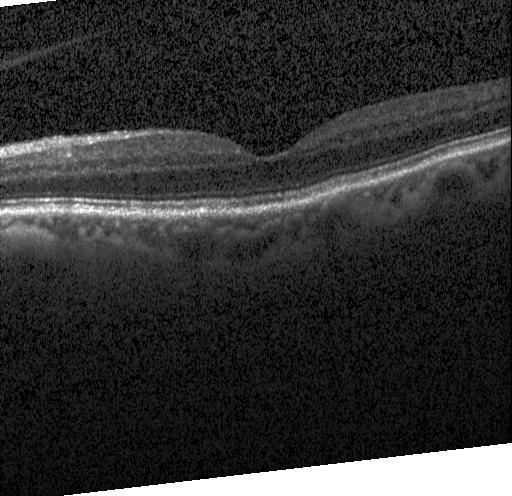

In [23]:
from IPython.display import display, Image
Image(train_df["filename"][0])

In [24]:
from matplotlib.pyplot import imread
image = imread(filename[24])
image.shape

(496, 512)

## Getting images and their labels

Since we've got the image ID's and their labels in a DataFrame (`train_df`), we'll use it to create:
* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [25]:
shuffle_train_df = train_df.sample(frac=1)
shuffle_train_df[500:510]

,filename,target
31069,Data/train/CNV/CNV-172472-174.jpeg,1
82815,Data/train/DRUSEN/DRUSEN-9442692-2.jpeg,3
4387,Data/train/NORMAL/NORMAL-2342005-3.jpeg,0
53247,Data/train/CNV/CNV-7732521-78.jpeg,1
62138,Data/train/CNV/CNV-967953-5.jpeg,1
18627,Data/train/NORMAL/NORMAL-7076479-29.jpeg,0
59455,Data/train/CNV/CNV-9300561-37.jpeg,1
24058,Data/train/NORMAL/NORMAL-909707-3.jpeg,0
25146,Data/train/NORMAL/NORMAL-9492768-2.jpeg,0
75489,Data/train/DRUSEN/DRUSEN-142234-1.jpeg,3


In [26]:
target = shuffle_train_df.target

unique_target = shuffle_train_df.target.to_numpy()
unique_target = np.unique(target)
unique_target

array([0, 1, 2, 3], dtype=int64)

In [27]:
bool_labels = [target == unique_target for target in shuffle_train_df.target]
bool_labels[15500]

array([ True, False, False, False])

In [28]:
len(bool_labels)

83484

In [29]:
#Example turning boolean array into integers
print(shuffle_train_df.target[0])
print(np.where(shuffle_train_df.target[0]==unique_target))
print(bool_labels[0].argmax())
print(bool_labels[0].astype(int))

0
(array([0], dtype=int64),)
1
[0 1 0 0]


In [30]:
X = shuffle_train_df.filename
Y = bool_labels

In [31]:
# widgets.IntSlider(
#     NUM_TRAIN=10000,
#     min=1000,
#     max=85000,
#     step=1000,
#     description='NUM_TRAIN:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d'
# )

In [32]:
NUM_TRAIN = len(train_df["target"])
NUM_TRAIN

83484

In [33]:
#Splitting our data into train and test
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X[:NUM_TRAIN], Y[:NUM_TRAIN], test_size=0.2, random_state=42,shuffle=False)

In [34]:
len(x_train),len( y_train),len(x_val),len(y_val)

(66787, 66787, 16697, 16697)

# Preprocessing images (turning images into Tensors)

Our labels are in numeric format but our images are still just file paths.

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpeg file) into Tensors.
4. Resize the `image` to be of shape (224, 224).
5. Return the modified `image`.

[TensorFlow documentation on loading images](https://www.tensorflow.org/tutorials/load_data/images).


In [35]:
from matplotlib.pyplot import imread
image = imread(train_df.filename[5])
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 17,  14,   6, ...,   3, 252, 252],
       [ 10,  11,   8, ...,   1, 252, 254],
       [ 10,  14,  15, ...,   0, 251, 255]], dtype=uint8)

In [36]:
image.shape

(496, 512)

In [37]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 512), dtype=uint8, numpy=
array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)>

# **Creating Function**

In [38]:
IMG_SIZE = 224

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image,channels= 3)
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE ])
  return image

In [39]:
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image, label

In [40]:
#Demo
(get_image_label(X[0], tf.constant(Y[0])))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.9968188 , 0.9968188 , 0.9968188 ],
         [0.98693484, 0.98693484, 0.98693484],
         [0.9842637 , 0.9842637 , 0.9842637 ],
         ...,
         [0.06917714, 0.06917714, 0.06917714],
         [0.06863876, 0.06863876, 0.06863876],
         [0.0861598 , 0.0861598 , 0.0861598 ]],
 
        [[0.98444384, 0.98444384, 0.98444384],
         [0.9965487 , 0.9965487 , 0.9965487 ],
         [0.9952481 , 0.9952481 , 0.9952481 ],
         ...,
         [0.15137047, 0.15137047, 0.15137047],
         [0.04035784, 0.04035784, 0.04035784],
         [0.11231919, 0.11231919, 0.11231919]],
 
        [[0.97476   , 0.97476   , 0.97476   ],
         [0.9939476 , 0.9939476 , 0.9939476 ],
         [0.96473604, 0.96473604, 0.96473604],
         ...,
         [0.04322843, 0.04322843, 0.04322843],
         [0.14423677, 0.14423677, 0.14423677],
         [0.02772959, 0.02772959, 0.02772959]],
 
        ...,
 
        [[0.00170086, 0.00170086

In [41]:
BATCH_SIZE = 32

def create_batch_data(x, y = None, batch_size=BATCH_SIZE, Valid_Data = False, Test_Data = False):
  if Test_Data:
     print("Creating test data batches...")
     data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
     data_batch = data.map(process_image).batch(batch_size)
     return data_batch

  elif Valid_Data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [42]:
train_data = create_batch_data(x_train, y_train)
valid_data = create_batch_data(x_val, y_val, Valid_Data = True)

Creating training data batches...
Creating validation data batches...


In [43]:
# Check out the different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)))

In [44]:
#import matplotlib.pyplot as plt
def show_25_images(images, labels):
  plt.figure(figsize=(10, 15))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_target[labels[i].argmax()])
    plt.axis("off")

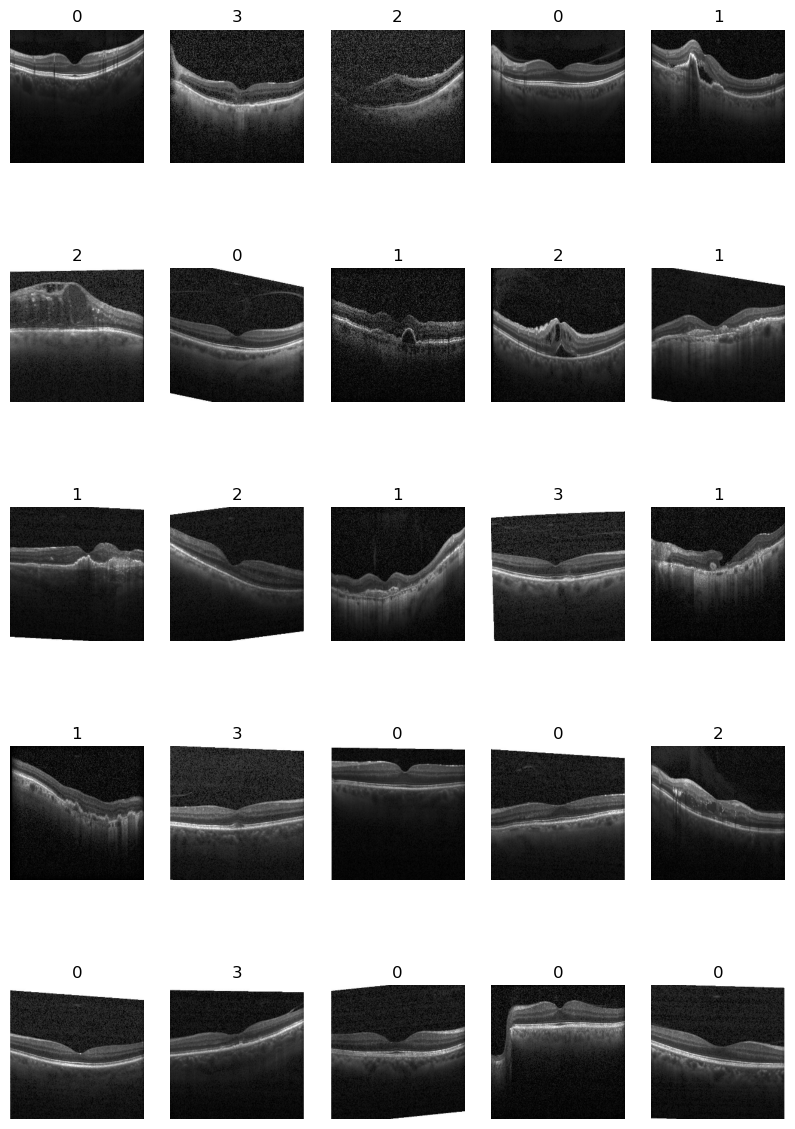

In [45]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

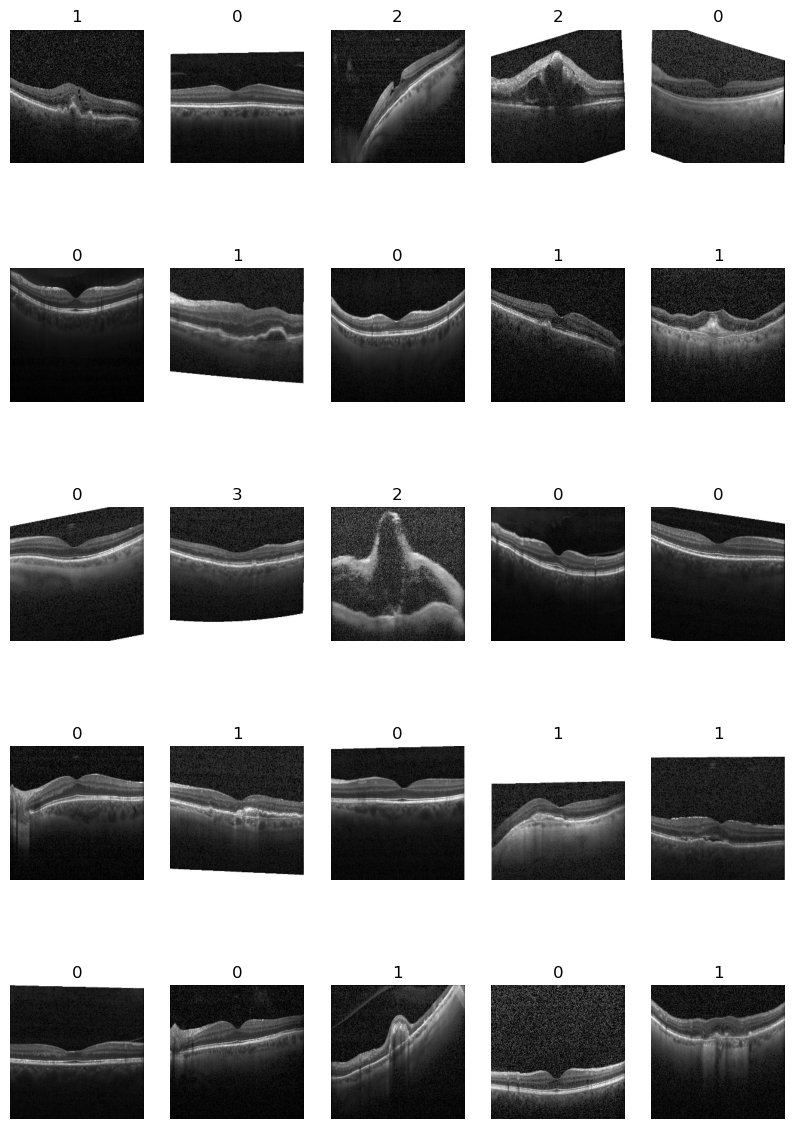

In [46]:
# Visualize validation images from the validation data batch
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

In [47]:
IMG_SIZE

224

In [48]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_target) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [49]:
INPUT_SHAPE

[None, 224, 224, 3]

In [50]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [54]:
# Create a model and check its details
# model = create_model()
# model.summary()

In [55]:
import datetime
def create_tensorboard_callback():
  logdir = os.path.join("logs/",
                        datetime.datetime.now( ).strftime("%Y%m%d - %H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [57]:
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:100,step:10}


In [55]:
if tf.config.list_physical_devices('GPU'):
  print("GPU available")

In [56]:
from keras.callbacks import TensorBoard
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])

  return model

In [57]:
 # model = train_model()

In [58]:
%load_ext tensorboard
%tensorboard --logdir logss/

# Saving and Loading the Model

In [59]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("models",
                          datetime.datetime.now().strftime("%Y%m-%H%M"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [60]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [61]:
# Save our trained model 
# save_model(model, suffix="images-Adam")

In [62]:
# Load our model trained on 1000 images
loaded_model = load_model('models/202308-0926-all-images-Adam.h5')

Loading saved model from: models/202308-0926-all-images-Adam.h5


In [63]:
predictions = loaded_model.predict(valid_data,verbose=1)

522/522 [==============================] - 205s 391ms/step


In [64]:
predictions

array([[9.9875855e-01, 1.1417291e-06, 5.1139257e-05, 1.1890688e-03],
       [1.0614673e-02, 5.5282568e-03, 9.4751114e-01, 3.6345955e-02],
       [8.5321939e-01, 1.4891376e-03, 5.3280789e-02, 9.2010766e-02],
       ...,
       [2.7681084e-05, 6.7289197e-01, 6.4336513e-05, 3.2701600e-01],
       [1.4920525e-05, 4.3072990e-01, 1.9009161e-03, 5.6735426e-01],
       [7.3639490e-04, 9.5489639e-01, 8.2363382e-05, 4.4284876e-02]],
      dtype=float32)

In [65]:
print(f"Predicted result :{np.argmax(predictions[0])}")

Predicted result :0


## Making prediction

In [66]:
predictions[1],np.sum(predictions[1])

(array([0.01061467, 0.00552826, 0.94751114, 0.03634595], dtype=float32), 1.0)

In [67]:
print(f"Predicted result:{np.argmax(predictions[1])}")

Predicted result:2


In [68]:
def get_pred_labels(predictions,pred_data = True):
    if pred_data :
        if (np.argmax(predictions) == 0):
            return "No Diseases"
        elif (np.argmax(predictions) == 1):
            return 'CNV'
        elif (np.argmax(predictions) == 2):
            return "DME"
        else:
            return 'DRUSEN'    
    
    else:
        if (predictions) == 0:
            return "No Diseases"
        elif (predictions) == 1:
            return 'CNV'
        elif (predictions) == 2:
            return "DME"
        else:
            return 'DRUSEN'    

In [69]:
get_pred = get_pred_labels(predictions[1])
get_pred 

'DME'

### Unbatch Data

In [70]:
def unbatchify(data):
    images = []
    labels = []
    
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(get_pred_labels(np.argmax(label),False))
    
    return images,labels

In [71]:
val_images, val_labels = unbatchify(valid_data)

In [72]:
val_images[0], val_labels[0]

(array([[[0.9787415 , 0.9787415 , 0.9787415 ],
         [0.9988095 , 0.9988095 , 0.9988095 ],
         [0.97920173, 0.97920173, 0.97920173],
         ...,
         [0.04345698, 0.04345698, 0.04345698],
         [0.00423203, 0.00423203, 0.00423203],
         [0.0231592 , 0.0231592 , 0.0231592 ]],
 
        [[0.9992497 , 0.9992497 , 0.9992497 ],
         [0.99034613, 0.99034613, 0.99034613],
         [0.9911665 , 0.9911665 , 0.9911665 ],
         ...,
         [0.10344218, 0.10344218, 0.10344218],
         [0.16112398, 0.16112398, 0.16112398],
         [0.06347292, 0.06347292, 0.06347292]],
 
        [[0.5326031 , 0.5326031 , 0.5326031 ],
         [0.00520206, 0.00520206, 0.00520206],
         [0.255062  , 0.255062  , 0.255062  ],
         ...,
         [0.04354384, 0.04354384, 0.04354384],
         [0.08616494, 0.08616494, 0.08616494],
         [0.05715575, 0.05715575, 0.05715575]],
 
        ...,
 
        [[0.0725989 , 0.0725989 , 0.0725989 ],
         [0.04396758, 0.04396758, 0.04396

-------------------------------------------------------------------------------------------------------------------------
#### Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem , it would also be good to see what other guesses our model is making.
Let's build a function to demonstrate. The function will:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
  -------------------------------------------------------------------------------------------------------------------------

In [73]:
def plot_pred(predictions, images, labels, n=1):
    pred, images, labels = predictions[n], images[n], labels[n]
    pred = get_pred_labels(pred)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    if pred == labels:
        color = "green"
    else:
        color = "red"
    plt.title(f"{pred} {np.max(predictions[n]) *100}% {labels}",color = color)

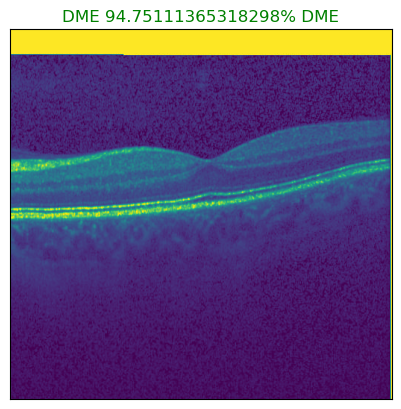

In [74]:
plot_pred(predictions,
          labels=val_labels,
          images=val_images)

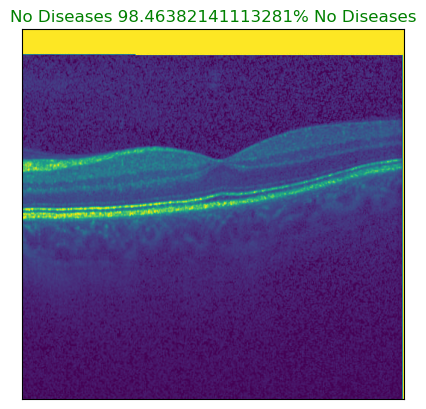

In [75]:
plot_pred(predictions,
          labels=val_labels,
          images=val_images,
          n = 1984)

# Training on full Dataset

In [76]:
len(X), len(Y)

(83484, 83484)

In [77]:
full_data = create_batch_data(X, Y)

Creating training data batches...


In [78]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [79]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [80]:
%tensorboard --logdir logss

In [81]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_early_stopping,full_model_tensorboard]
               )

Epoch 1/20
 480/2609 [====>.........................] - ETA: 15:52 - loss: 0.5295 - accuracy: 0.8059

KeyboardInterrupt: 

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

# Making Prediction on Images

In [82]:
# Load our model trained on 1000 images
loaded_model = load_model('models/202308-0926-all-images-Adam.h5')

Loading saved model from: models/202308-0926-all-images-Adam.h5


In [83]:
test_path = "Test_Images"
test_data = ["Test_Images/"+filename for filename in os.listdir(test_path)]

In [84]:
test_data

['Test_Images/CNV-103044-3.jpeg',
 'Test_Images/CNV-103044-4.jpeg',
 'Test_Images/CNV-53018-1.jpeg',
 'Test_Images/DME-15208-1.jpeg',
 'Test_Images/DME-30521-6.jpeg',
 'Test_Images/DRUSEN-228939-1.jpeg',
 'Test_Images/DRUSEN-2785977-1.jpeg',
 'Test_Images/DRUSEN-303435-1.jpeg',
 'Test_Images/DRUSEN-66861-1.jpeg',
 'Test_Images/DRUSEN-95633-1.jpeg',
 'Test_Images/DRUSEN.jpeg',
 'Test_Images/NORMAL-12494-1.jpeg']

In [85]:
predict_on_image = create_batch_data(test_data,Test_Data=True)
predict_on_image 

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [86]:
result_on_predict = loaded_model.predict(predict_on_image)

1/1 [==============================] - 2s 2s/step


In [87]:
result_on_predict

array([[9.6321382e-05, 9.4418913e-01, 2.3347270e-02, 3.2367088e-02],
       [4.8197513e-10, 9.9998873e-01, 7.1973982e-06, 4.0193222e-06],
       [1.0415556e-05, 9.7640085e-01, 1.2555565e-02, 1.1033261e-02],
       [1.8989193e-01, 4.8011364e-03, 7.9961771e-01, 5.6890687e-03],
       [1.0805777e-07, 7.3005074e-05, 9.9705362e-01, 2.8732098e-03],
       [5.7779218e-04, 3.5061803e-02, 1.5632395e-02, 9.4872802e-01],
       [2.7510736e-04, 2.8731588e-01, 7.7225739e-04, 7.1163672e-01],
       [2.0863086e-03, 5.8537257e-01, 5.3261992e-02, 3.5927904e-01],
       [3.6828381e-01, 8.2435116e-02, 3.6892835e-02, 5.1238817e-01],
       [1.2587233e-02, 9.2202432e-02, 1.5852426e-03, 8.9362508e-01],
       [2.1627275e-05, 9.7924131e-01, 3.2396085e-05, 2.0704595e-02],
       [6.7182261e-01, 1.7066330e-02, 6.8528645e-02, 2.4258250e-01]],
      dtype=float32)

In [88]:
result_label = [ get_pred_labels(label) for label in result_on_predict]

In [89]:
result_label

['CNV',
 'CNV',
 'CNV',
 'DME',
 'DME',
 'DRUSEN',
 'DRUSEN',
 'CNV',
 'DRUSEN',
 'DRUSEN',
 'CNV',
 'No Diseases']

In [90]:
result_images = []
for image in predict_on_image.unbatch().as_numpy_iterator():
    result_images.append(image)
    
result_images

[array([[[0.43738493, 0.43738493, 0.43738493],
         [0.21456584, 0.21456584, 0.21456584],
         [0.06952782, 0.06952782, 0.06952782],
         ...,
         [0.86883044, 0.86883044, 0.86883044],
         [0.99583817, 0.99583817, 0.99583817],
         [0.97312945, 0.97312945, 0.97312945]],
 
        [[0.36709684, 0.36709684, 0.36709684],
         [0.1284014 , 0.1284014 , 0.1284014 ],
         [0.01515606, 0.01515606, 0.01515606],
         ...,
         [0.03843442, 0.03843442, 0.03843442],
         [0.14439599, 0.14439599, 0.14439599],
         [0.00365169, 0.00365169, 0.00365169]],
 
        [[0.41971785, 0.41971785, 0.41971785],
         [0.05440174, 0.05440174, 0.05440174],
         [0.18753503, 0.18753503, 0.18753503],
         ...,
         [0.14147034, 0.14147034, 0.14147034],
         [0.15354097, 0.15354097, 0.15354097],
         [0.06795572, 0.06795572, 0.06795572]],
 
        ...,
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.     

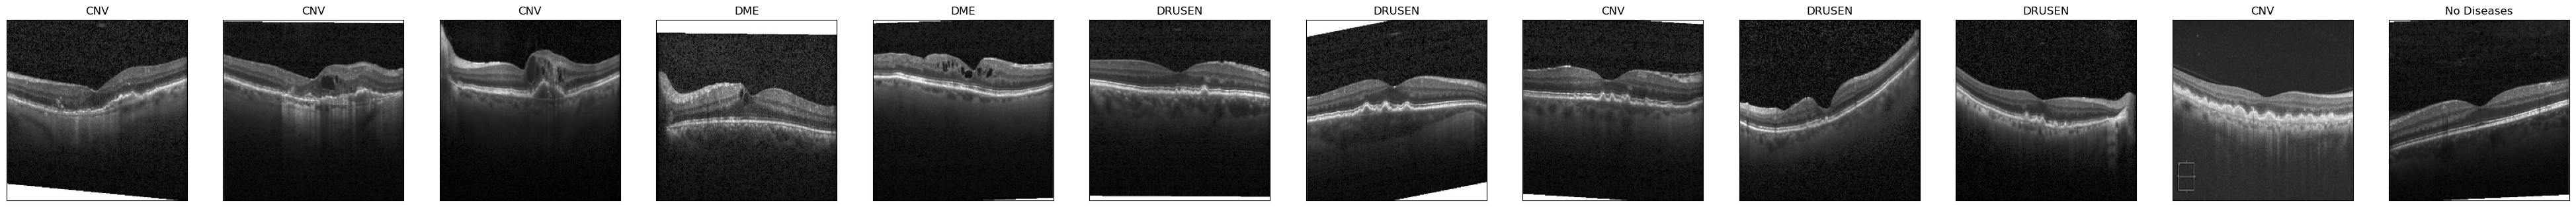

In [101]:
plt.figure(figsize=(50,10))
for i,image in enumerate(result_images):
    plt.subplot(1,len(result_on_predict),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(result_label[i])
    plt.imshow(image)

In [92]:
test_data

['Test_Images/CNV-103044-3.jpeg',
 'Test_Images/CNV-103044-4.jpeg',
 'Test_Images/CNV-53018-1.jpeg',
 'Test_Images/DME-15208-1.jpeg',
 'Test_Images/DME-30521-6.jpeg',
 'Test_Images/DRUSEN-228939-1.jpeg',
 'Test_Images/DRUSEN-2785977-1.jpeg',
 'Test_Images/DRUSEN-303435-1.jpeg',
 'Test_Images/DRUSEN-66861-1.jpeg',
 'Test_Images/DRUSEN-95633-1.jpeg',
 'Test_Images/DRUSEN.jpeg',
 'Test_Images/NORMAL-12494-1.jpeg']